<a href="https://colab.research.google.com/github/NiyonshutiDavid/api_endpoint/blob/main/linear_regression/Crop_Yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing required libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Loading data and displaying the first few rows

In [18]:
data = pd.read_csv("/content/climate_change_impact_on_agriculture_2024.csv")

print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.0

## Data cleaning, to remove string data, and get only numerical data

In [19]:
# 2. Data Cleaning
# Remove the row with the year 2024
data = data[data.Year != 2024]
data = data.reset_index(drop=True) # Reset index after removing a row

numerical_cols = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
                  'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA',
                  'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD']
data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=numerical_cols)

# Handle categorical features (Country, Region, Crop_Type, Adaptation_Strategies)
# We'll use one-hot encoding for these
categorical_cols = ['Country', 'Region', 'Crop_Type', 'Adaptation_Strategies']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)



Descriptive Statistics of Numerical Features:
       Average_Temperature_C  Total_Precipitation_mm  CO2_Emissions_MT  \
count            9719.000000             9719.000000       9719.000000   
mean               15.248111             1612.514055         15.242292   
std                11.471456              804.951621          8.588226   
min                -4.990000              200.150000          0.500000   
25%                 5.425000              926.865000          7.755000   
50%                15.200000             1614.880000         15.180000   
75%                25.340000             2307.005000         22.825000   
max                35.000000             2999.670000         30.000000   

       Crop_Yield_MT_per_HA  Extreme_Weather_Events  Irrigation_Access_%  \
count           9719.000000             9719.000000          9719.000000   
mean               2.243305                4.989299            55.262297   
std                0.999458                3.168826       

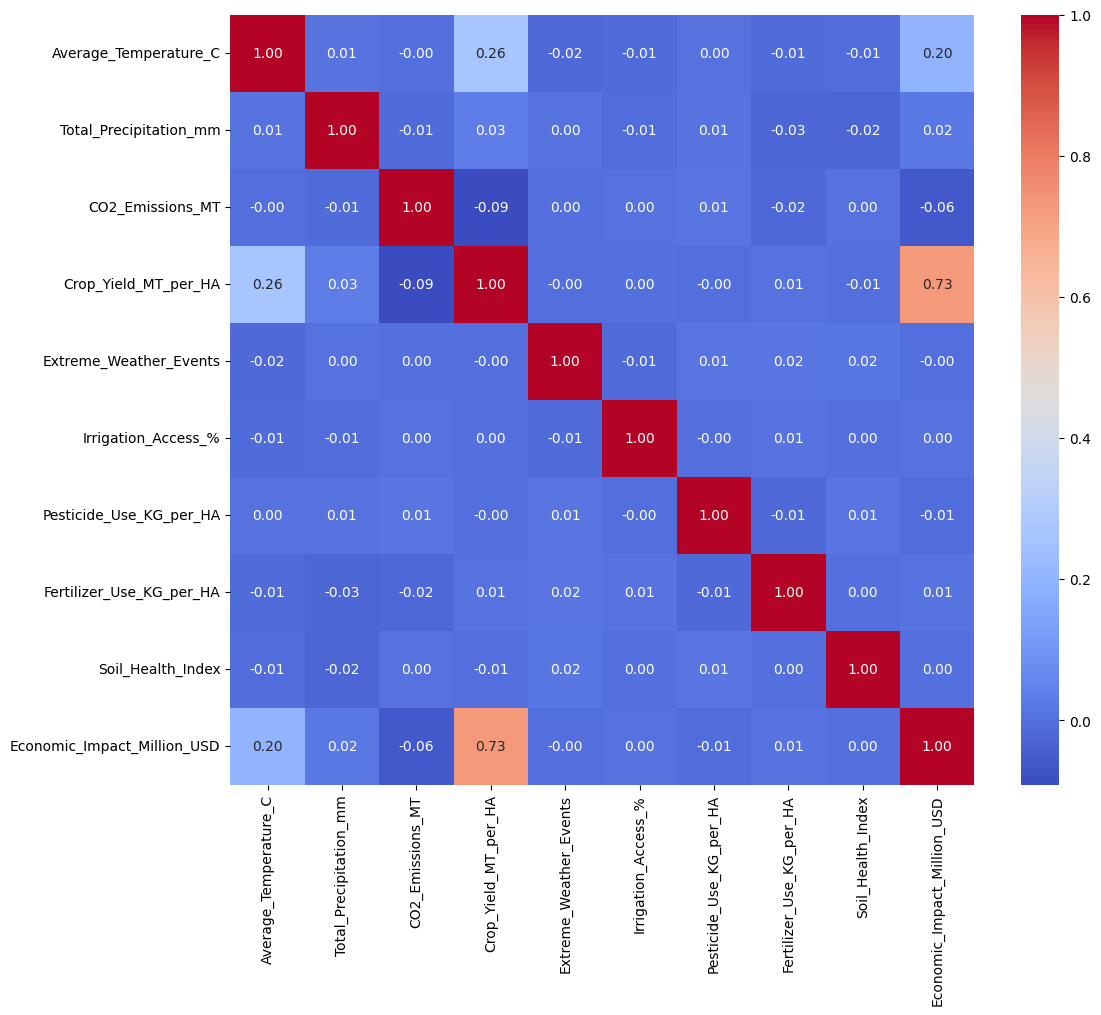

In [20]:
# 3. EDA (after handling categorical variables)
print("\nDescriptive Statistics of Numerical Features:")
print(data[numerical_cols].describe())
print("\nCorrelation Matrix:")
plt.figure(figsize=(12, 10))
sns.heatmap(data[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [21]:
# 4. Model Training and Evaluation
# Define features (X) and target (y)
X = data.drop('Economic_Impact_Million_USD', axis=1)
y = data['Economic_Impact_Million_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)


In [23]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)

In [24]:
# Random Forest Regression
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
forest_y_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)

In [25]:
# Model Comparison
print("\nModel Evaluation:")
print("\nLinear Regression:")
print(f"  MSE: {linear_mse:.2f}")
print(f"  R-squared: {linear_r2:.2f}")

print("\nDecision Tree Regression:")
print(f"  MSE: {tree_mse:.2f}")
print(f"  R-squared: {tree_r2:.2f}")

print("\nRandom Forest Regression:")
print(f"  MSE: {forest_mse:.2f}")
print(f"  R-squared: {forest_r2:.2f}")


Model Evaluation:

Linear Regression:
  MSE: 79961.63
  R-squared: 0.51

Decision Tree Regression:
  MSE: 164850.26
  R-squared: -0.02

Random Forest Regression:
  MSE: 81659.34
  R-squared: 0.50


In [26]:
# Determine the best model (based on MSE)
models = {
    "Linear Regression": (linear_model, linear_mse),
    "Decision Tree Regression": (tree_model, tree_mse),
    "Random Forest Regression": (forest_model, forest_mse),
}

best_model_name, (best_model, best_mse) = min(models.items(), key=lambda x: x[1][1])
print(f"\nBest Model (based on MSE): {best_model_name} (MSE: {best_mse:.2f})")



Best Model (based on MSE): Linear Regression (MSE: 79961.63)


In [27]:
# 5. Interpretation (for Linear Regression)
if best_model_name == "Linear Regression":
    print("\nLinear Regression Coefficients:")
    print(pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient']))
    print(f"Linear Regression Intercept: {linear_model.intercept_:.2f}")


Linear Regression Coefficients:
                                               Coefficient
Year                                              0.311802
Average_Temperature_C                             0.271785
Total_Precipitation_mm                            0.000183
CO2_Emissions_MT                                  0.541802
Crop_Yield_MT_per_HA                            303.129996
...                                                    ...
Crop_Type_Wheat                                   9.980639
Adaptation_Strategies_Drought-resistant Crops     9.138203
Adaptation_Strategies_No Adaptation              -1.660008
Adaptation_Strategies_Organic Farming           -13.751540
Adaptation_Strategies_Water Management           -5.610552

[65 rows x 1 columns]
Linear Regression Intercept: -671.33



Model Evaluation:

Linear Regression:
  MSE: 79961.63
  R-squared: 0.51


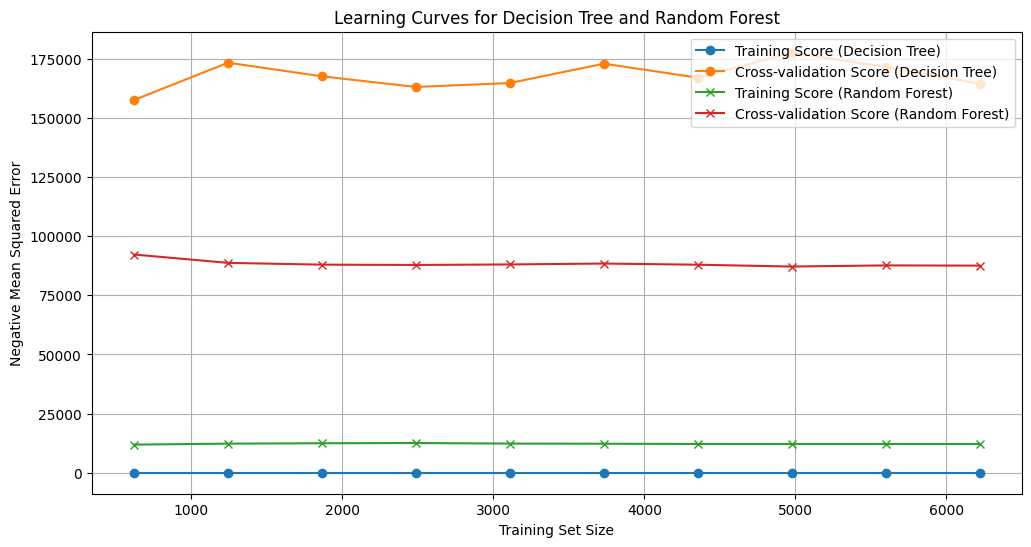


Best Model (based on MSE): Linear Regression saved as 'economic_impact_model.pkl'

Linear Regression Coefficients:
                                               Coefficient
Year                                              0.311802
Average_Temperature_C                             0.271785
Total_Precipitation_mm                            0.000183
CO2_Emissions_MT                                  0.541802
Crop_Yield_MT_per_HA                            303.129996
...                                                    ...
Crop_Type_Wheat                                   9.980639
Adaptation_Strategies_Drought-resistant Crops     9.138203
Adaptation_Strategies_No Adaptation              -1.660008
Adaptation_Strategies_Organic Farming           -13.751540
Adaptation_Strategies_Water Management           -5.610552

[65 rows x 1 columns]
Linear Regression Intercept: -671.33


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# --- 1. Load Data (Replace with your actual data loading) ---
# ... (Your data loading code here - as in the previous full notebook) ...
#data = pd.DataFrame({...}) # Replace with your DataFrame creation

# --- 2. Data Cleaning and Preprocessing ---
# ... (Your data cleaning and preprocessing code here) ...


# --- 3. EDA ---
# ... (EDA code here) ...

# --- 4. Model Training and Evaluation ---
X = data.drop('Economic_Impact_Million_USD', axis=1)
y = data['Economic_Impact_Million_USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression (Keeping for comparison) ---
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)

# --- Decision Tree Regression ---
tree_model = DecisionTreeRegressor(random_state=42)
train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(
    tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean_dt = -np.mean(train_scores_dt, axis=1)
test_scores_mean_dt = -np.mean(test_scores_dt, axis=1)

# --- Random Forest Regression ---
forest_model = RandomForestRegressor(random_state=42)
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    forest_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean_rf = -np.mean(train_scores_rf, axis=1)
test_scores_mean_rf = -np.mean(test_scores_rf, axis=1)

# --- Model Comparison ---
print("\nModel Evaluation:")
print("\nLinear Regression:")
print(f"  MSE: {linear_mse:.2f}")
print(f"  R-squared: {linear_r2:.2f}")

# ... (print Decision Tree and Random Forest metrics as before) ...

# --- 5. Plotting Learning Curves ---
plt.figure(figsize=(12, 6))

plt.plot(train_sizes_dt, train_scores_mean_dt, 'o-', label="Training Score (Decision Tree)")
plt.plot(train_sizes_dt, test_scores_mean_dt, 'o-', label="Cross-validation Score (Decision Tree)")

plt.plot(train_sizes_rf, train_scores_mean_rf, 'x-', label="Training Score (Random Forest)")
plt.plot(train_sizes_rf, test_scores_mean_rf, 'x-', label="Cross-validation Score (Random Forest)")

plt.xlabel("Training Set Size")
plt.ylabel("Negative Mean Squared Error")
plt.title("Learning Curves for Decision Tree and Random Forest")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# --- 6. Save the Best Model ---
models = {
    'Linear Regression': linear_mse,
    'Decision Tree': tree_mse,
    'Random Forest': forest_mse
}
best_model_name = min(models, key=models.get)
if best_model_name == 'Linear Regression':
    best_model = linear_model
elif best_model_name == 'Decision Tree':
    best_model = tree_model
else:
    best_model = forest_model
joblib.dump(best_model, 'economic_impact_model.pkl')
print(f"\nBest Model (based on MSE): {best_model_name} saved as 'economic_impact_model.pkl'")

# --- Optional: Print Coefficients for Linear Regression ---
if best_model_name == "Linear Regression":
    print("\nLinear Regression Coefficients:")
    print(pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient']))
    print(f"Linear Regression Intercept: {linear_model.intercept_:.2f}")